<h1>Desnity Model</h1>
<p>This file present the developed alorithm and model for density of Athabasca Bitumen samples. The data of all 3 samples has been given to the model while the only input features are <b>temperature</b> and <b>pressure</b>.</p>

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import copy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

title_font = {'fontname':'Arial', 'size':'22', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
axis_font = {'fontname':'Arial', 'size':'18'}

<h2>Read desnity data</h2>

In [2]:
df = pd.read_csv('Density.csv')
display(df.head())
input_cols = ['T', 'P']#['IBP', 'MW', 'T', 'P']
X = df[input_cols]
y = df.Density
print('Size of featuers:',X.shape, 'Size of targets:', y.shape)

,IBP,MW,T,P,Density
0,192.4,539.2,190.0,2.01,907.6
1,192.4,539.2,174.6,2.01,917.3
2,192.4,539.2,150.3,2.02,932.7
3,192.4,539.2,125.0,1.99,947.9
4,192.4,539.2,100.6,2.02,962.6


Size of featuers: (189, 2) Size of targets: (189,)


<h2>Generating a Random Foreset model</h2>
<h3>Find the best trained model</h3>

  1, test: rmse= 2.21, r2= 0.992331 ==> Better Model
  2, test: rmse= 2.64, r2= 0.989132
  3, test: rmse= 2.58, r2= 0.989588
  4, test: rmse= 2.60, r2= 0.989389
  5, test: rmse= 2.79, r2= 0.987810
  6, test: rmse= 2.45, r2= 0.990615
  7, test: rmse= 2.66, r2= 0.988949
  8, test: rmse= 2.49, r2= 0.990305
  9, test: rmse= 2.30, r2= 0.991750
 10, test: rmse= 2.58, r2= 0.989614
 11, test: rmse= 2.33, r2= 0.991538
 12, test: rmse= 2.80, r2= 0.987734
 13, test: rmse= 2.37, r2= 0.991202
 14, test: rmse= 2.33, r2= 0.991511
 15, test: rmse= 2.58, r2= 0.989579
 16, test: rmse= 2.25, r2= 0.992050
 17, test: rmse= 2.55, r2= 0.989809
 18, test: rmse= 2.71, r2= 0.988469
 19, test: rmse= 2.61, r2= 0.989348
 20, test: rmse= 2.72, r2= 0.988449
 21, test: rmse= 2.45, r2= 0.990568
 22, test: rmse= 2.24, r2= 0.992164
 23, test: rmse= 2.43, r2= 0.990772
 24, test: rmse= 2.70, r2= 0.988587
 25, test: rmse= 2.49, r2= 0.990335
 26, test: rmse= 2.57, r2= 0.989644
 27, test: rmse= 2.69, r2= 0.988695
 28, test: 

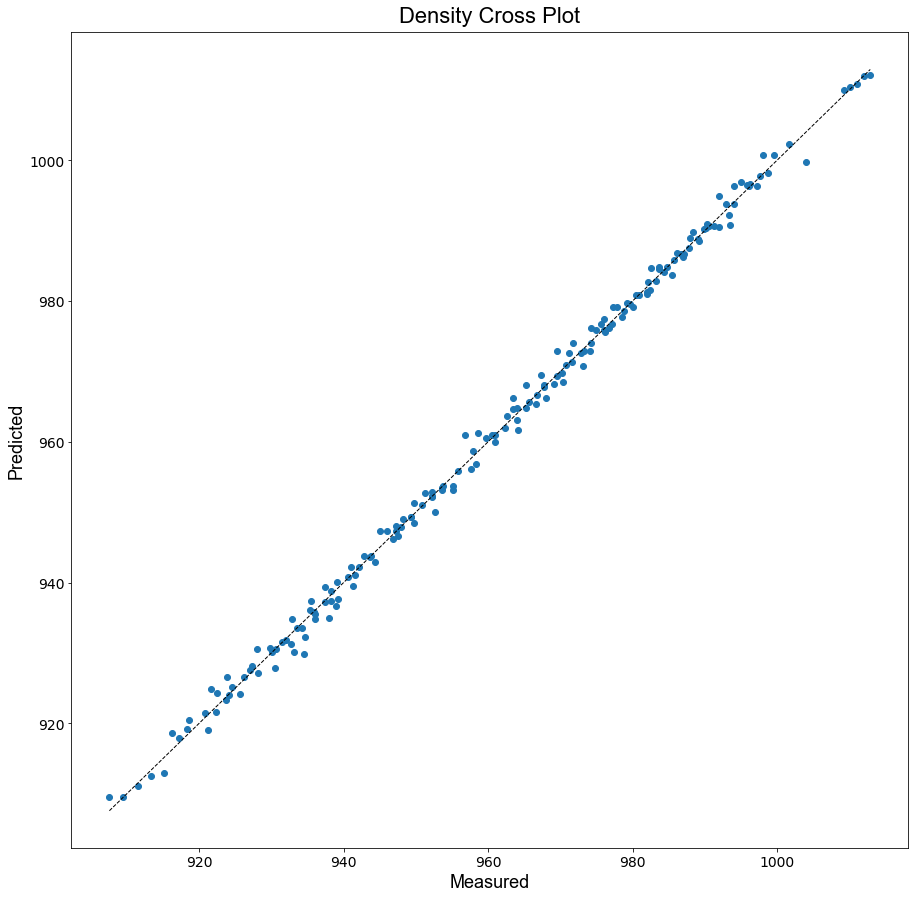

In [3]:
# splitting the samples randomely: 85% training, 15% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)
rf = RandomForestRegressor(n_estimators=5)

r2_rep = 0
for it in range(1, 201):
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    r2_train = metrics.r2_score(y_train, y_train_pred)

    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    r2_test = metrics.r2_score(y_test, y_test_pred)

    rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
    r2 = metrics.r2_score(y, y_pred)
    
    if r2_test > r2_rep:
        rf_rep = copy.copy(rf)
        r2_rep = r2_test
        print('{0:3d}, test: rmse= {1:.2f}, r2= {2:02f} ==> Better Model'.format(it, rmse_test, r2_test))
    else:
        print('{0:3d}, test: rmse= {1:.2f}, r2= {2:02f}'.format(it, rmse_test, r2_test))
        
y_pred       = rf_rep.predict(X)
y_train_pred = rf_rep.predict(X_train)
y_test_pred  = rf_rep.predict(X_test)

rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
r2_train = metrics.r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_test = metrics.r2_score(y_test, y_test_pred)

rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
r2 = metrics.r2_score(y, y_pred)
print('\nFinal Model Results\n-----------------')
print('train: rmse= {0:.2f}, r2= {1:02f}'.format(rmse_train, r2_train))
print('test : rmse= {0:.2f}, r2= {1:02f}'.format(rmse_test, r2_test))
print('all  : rmse= {0:.2f}, r2= {1:02f}'.format(rmse, r2))

plt.rcParams['figure.figsize'] = [15, 15]
fig, ax = plt.subplots()
ax.scatter(y, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Measured', **axis_font)
ax.set_ylabel('Predicted', **axis_font)
ax.set_title('Density Cross Plot', **title_font)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Save the model
import pickle
f = open('DensityModel.pickle', 'wb')   # Pickle file is newly created
pickle.dump(rf_rep, f, -1)          # dump data to f
f.close()

<h3>Feature Importance</h3>
<p>As it can be seen from the following figure, the dominant parameter to compute the density is the temperature and the pressure can be ignored.</p>

[('T', 0.98271658845680321), ('P', 0.017283411543196837)]


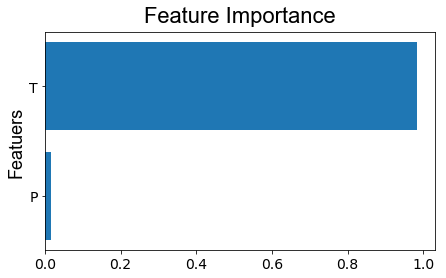

In [4]:
feature_importances = rf_rep.feature_importances_
print(list(zip(input_cols, feature_importances)))
feature_importances_sorted = sorted(feature_importances)
y_ticks_names = [x for _,x in sorted(zip(feature_importances, input_cols))]

y_ticks = range(1,len(feature_importances) + 1)

plt.rcParams['figure.figsize'] = [7, 4]
fig, ax = plt.subplots()
ax.barh(y_ticks, feature_importances_sorted)
plt.yticks(y_ticks, y_ticks_names)
ax.set_ylabel('Featuers', **axis_font)
ax.set_title('Feature Importance', **title_font)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Heatmap of denisty absolute error

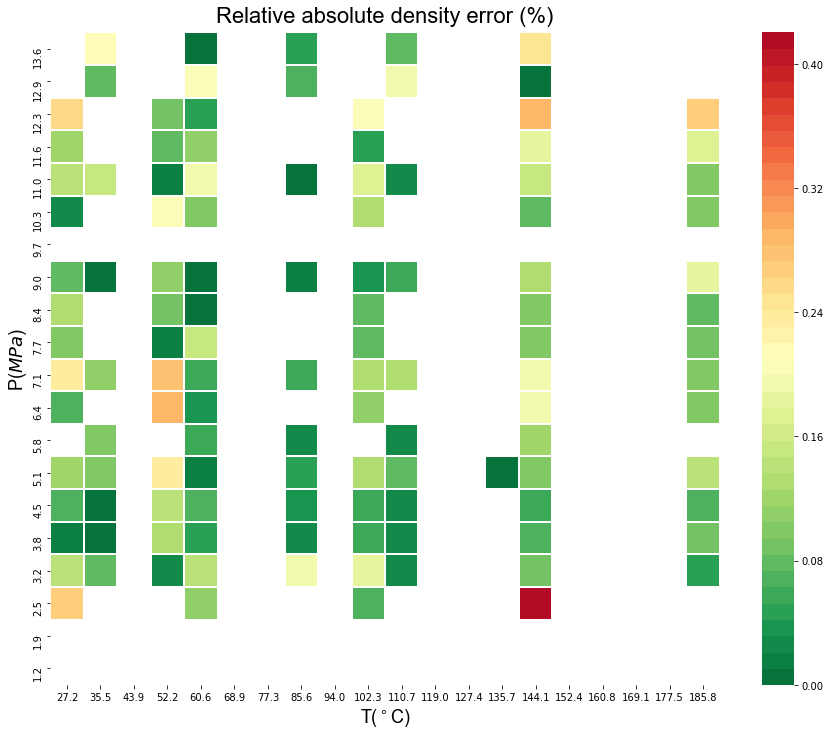

In [5]:
df2 = df
df2['Density_pred'] = rf_rep.predict(X)
df2['Density_err'] = np.abs(df2['Density'] - df2['Density_pred'])

# create the heatmap
min_points_per_grid = 1
divs = 20
T_bins = np.linspace(min(df2['T']), max(df2['T']), divs + 1)
P_bins = np.linspace(min(df2['P']), max(df2['P']), divs + 1)
T_ticks_heatmap = np.round([(T_bins[i-1] + T_bins[i])/2 for i in range(1, len(T_bins))], 1)    
P_ticks_heatmap = np.round([(P_bins[i-1] + P_bins[i])/2 for i in range(1, len(P_bins))], 1)

df_heatmap = df2[['T', 'P', 'Density', 'Density_err']].groupby(
    [pd.cut(df2['T'], bins=T_bins),pd.cut(df2['P'], bins=P_bins)]).aggregate(lambda x: tuple(x))

for i in df_heatmap.index:
    if df_heatmap.loc[i, 'T'] is np.nan or None:
        df_heatmap.loc[i, 'Density_err_median'] = np.nan
    else:
        if len(tuple(df_heatmap.loc[i, 'Density_err'])) >= min_points_per_grid:
            df_heatmap.loc[i, 'Density_err_median'] = np.median(df_heatmap.loc[i, 'Density_err']) / np.median(df_heatmap.loc[i, 'Density']) * 100
        else:
            df_heatmap.loc[i, 'Density_err_median'] = np.nan

fig, ax2 = plt.subplots(figsize=(15,12))
pal = sns.color_palette("RdYlGn_r", 40)    
ax2 = sns.heatmap(data=np.array(df_heatmap['Density_err_median'].as_matrix()).reshape((divs, divs)),
                  xticklabels=T_ticks_heatmap, yticklabels=P_ticks_heatmap,
                  linewidths=1,
                  cmap=pal)
ax2.invert_yaxis()
ax2.set_xlabel(r"T($^\circ$C)", **axis_font)
ax2.set_ylabel("P($MPa$)", **axis_font)
ax2.set_title("Relative absolute density error (%)", **title_font)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=10)

plt.show()